![](img/banner.png)
%%HTML
<script src="require.js"></script>

## Add coordinates as spatial features to clustering

Image Segmentation, Add pixels's coordinates

**Mahmood Amintoosi, Fall 2024**

Computer Science Dept, Ferdowsi University of Mashhad

In [1]:
# Importing Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize

In [4]:
coffee = data.coffee()
# coffee = data.cat()
coffee =  resize(coffee, (coffee.shape[0] // 2, coffee.shape[1] // 2),
                       anti_aliasing=True)
gray_coffee = rgb2gray(coffee)

X = coffee.reshape((-1,3))

K = 16
kmeans = KMeans(n_clusters=K)

# Clustering only pixels' intensities
kmeans.fit(X)
labels = kmeans.labels_
seg_img_kmeans = labels.reshape(gray_coffee.shape)

# Clustering intensities and coordinates

# create an array of x and y coordinates for each pixel
h, w = gray_coffee.shape
xx, yy = np.meshgrid(np.arange(w), np.arange(h))
coords = np.concatenate((xx.reshape(-1,1),yy.reshape(-1,1)),axis=1)
# coords = np.c_[xx.ravel(), yy.ravel()]

# append the coordinates to the grayscale values
X_xy = np.concatenate((X, coords), axis=1)
# X = np.c_[X, coords]

# Normalizing X
X_xy = X_xy / X_xy.max(axis = 0)

kmeans = KMeans(n_clusters=K)
kmeans.fit(X_xy)
labels_xy = kmeans.labels_
# cluster_centers = kmeans.cluster_centers_
seg_img_kmeans_xy = labels_xy.reshape(gray_coffee.shape)

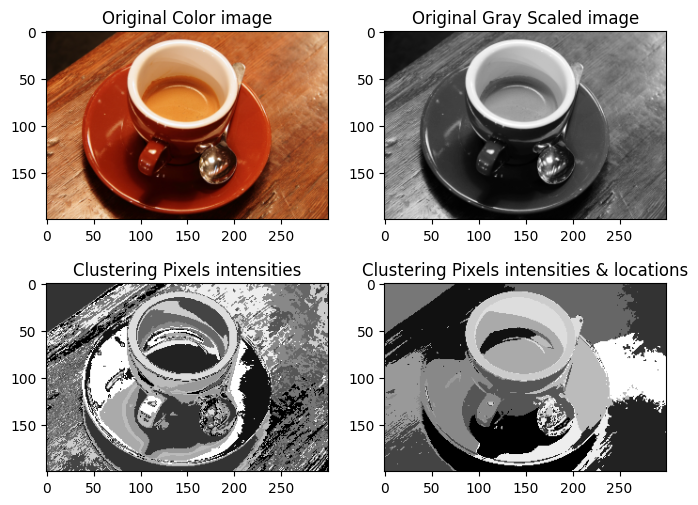

In [5]:
plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)
plt.imshow(coffee)
plt.title('Original Color image')
plt.subplot(2,2,2)
plt.imshow(gray_coffee, cmap = 'gray')
plt.title('Original Gray Scaled image')
plt.subplot(2,2,3)
plt.imshow(seg_img_kmeans, cmap = 'gray')
plt.title('Clustering Pixels intensities')
plt.subplot(2,2,4)
plt.imshow(seg_img_kmeans_xy, cmap = 'gray')
plt.title('Clustering Pixels intensities & locations');


Reorder labels, base on the gray scale image

In [6]:
gray_pixels = gray_coffee.flatten()
mean_gray_pixels = np.zeros(K)
for k in range(K):
    mean_gray_pixels[k] = np.mean(gray_pixels[labels == k])

order = np.argsort(mean_gray_pixels)
# order, mean_gray_pixels, labels

In [7]:
new_labels = np.zeros_like(labels)
for k in range(K):
    new_labels[labels==k] = np.where(order == k)[0]

seg_img_kmeans = new_labels.reshape(gray_coffee.shape)
# labels[:5], new_labels[:5]

In [8]:
mean_gray_pixels = np.zeros(K)
for k in range(K):
    mean_gray_pixels[k] = np.mean(gray_pixels[labels_xy == k])

order = np.argsort(mean_gray_pixels)
new_labels_xy = np.zeros_like(labels_xy)
for k in range(K):
    new_labels_xy[labels_xy==k] = np.where(order == k)[0]
# new_labels    
seg_img_kmeans_xy = new_labels_xy.reshape(gray_coffee.shape)

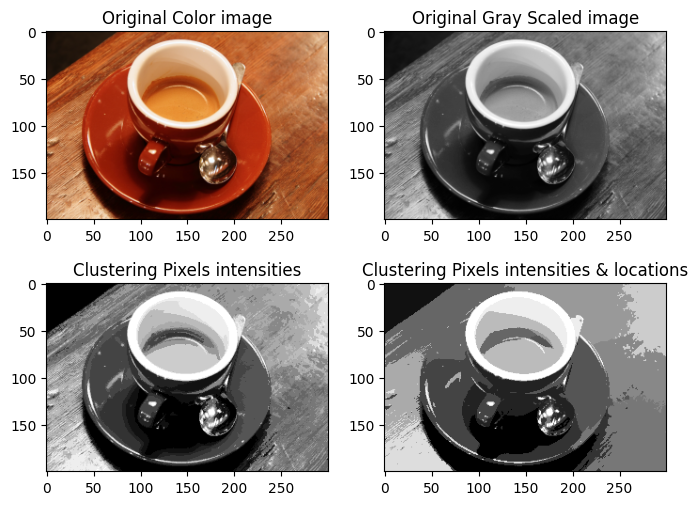

In [9]:
plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)
plt.imshow(coffee, cmap = 'gray')
plt.title('Original Color image')
plt.subplot(2,2,2)
plt.imshow(gray_coffee, cmap = 'gray')
plt.title('Original Gray Scaled image')
plt.subplot(2,2,3)
plt.imshow(seg_img_kmeans, cmap = 'gray')
plt.title('Clustering Pixels intensities')
plt.subplot(2,2,4)
plt.imshow(seg_img_kmeans_xy, cmap = 'gray')
plt.title('Clustering Pixels intensities & locations');